In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1-Charger ce dataset.
### 2-Utiliser les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset (nombre d'observations et de variables, types des variables, valeurs manquantes, etc.).

In [142]:
df = pd.read_csv("marvel.csv")
print(df.head())

print("\nNombre d'observations et de variables", df.shape)
print("\nTypes des variables", df.dtypes)
print("\nValeurs manquantes", df.isnull().sum())

print("Informations de base sur le dataset")
print(df.info())


   page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   

### 3-Une des variables comporte t-elle beaucoup trop de valeurs manquantes ? Si oui la supprimer.

#### la variable GSM comporte trop de valeurs manquantes, on a que 90 observations qui sont non null parmi les 16376, donc c'est la variable à supprimer

In [143]:
#nombre de valeurs manquantes pour "GSM"
GSM_NAN = df["GSM"].isnull().sum()
print("Nombre de valeurs manquantes pour la variable 'GSM':", GSM_NAN)

df.drop("GSM", axis=1)


Nombre de valeurs manquantes pour la variable 'GSM': 16286


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,Living Characters,NaN,NaN,NaN


### 4-Étudier la variable 'ALIGN' : tables des effectifs et fréquences, diagramme en barres, diagramme circulaire.

Table des effectifs de 'ALIGN'
Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

Table des fréquences de 'ALIGN'
Bad Characters        0.495429
Good Characters       0.341787
Neutral Characters    0.162784
Name: ALIGN, dtype: float64


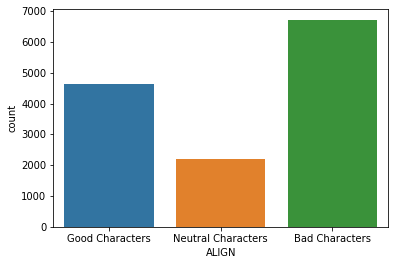

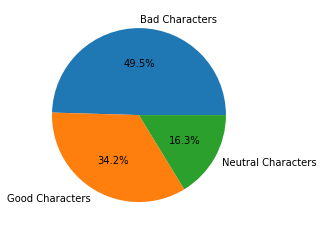

In [144]:
# Table des effectifs
effectifs = df['ALIGN'].value_counts()
print("Table des effectifs de 'ALIGN'")
print(effectifs)

# Table des fréquences
freq = df['ALIGN'].value_counts(normalize=True) #*100 c'est on veut les pourcentages
print("\nTable des fréquences de 'ALIGN'")
print(freq)

# Diagramme en barres
sns.countplot(data=df, x='ALIGN')
plt.show()

# Diagramme circulaire
plt.pie(effectifs, labels=effectifs.index, autopct='%1.1f%%')
plt.show()

### 5-Reprendre le diagramme en barres de la question 3, et tester les attributs et fonctions suivants afin de le personnaliser : 'figsize', 'axes', 'set_title', 'set_xlabel', 'set_ylabel', 'xticks', 'yticks'. On prendra l'habitude dans la suite de mettre en forme (titre, axes, labels, etc.) tous les graphiques que l'on réalisera.

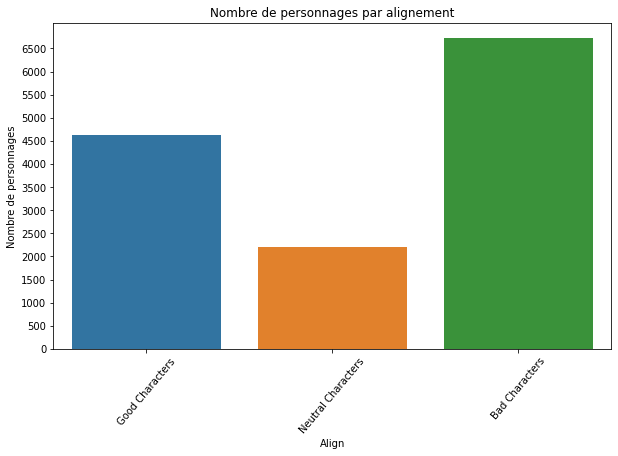

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagramme en barres
plt.figure(figsize=(10, 6))  # Définit la taille de la figure
ax = sns.countplot(data=df, x='ALIGN')

# Personnalisation des axes et des étiquettes
ax.set_title('Nombre de personnages par alignement') 
ax.set_xlabel('Align') 
ax.set_ylabel('Nombre de personnages')  

# Rotation des noms des modalités
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

# Affichage des éffectifs sur l'axe des ordonnées avec un pas de 500
plt.yticks(range(0, effectifs.max()+1, 500))

plt.show()

### 6-Étudier la variable 'ALIVE' : tables des effectifs et fréquences, diagramme en barres, diagramme circulaire.

Table des effectifs de 'ALIVE'
Living Characters      12608
Deceased Characters     3765
Name: ALIVE, dtype: int64

Table des fréquences de 'ALIVE'
Living Characters      0.770048
Deceased Characters    0.229952
Name: ALIVE, dtype: float64


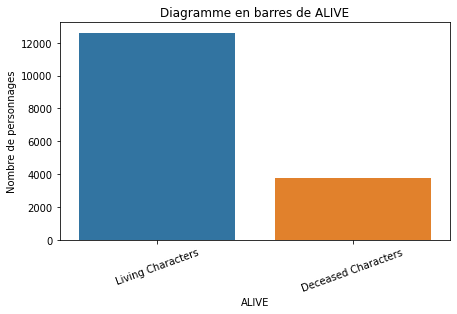

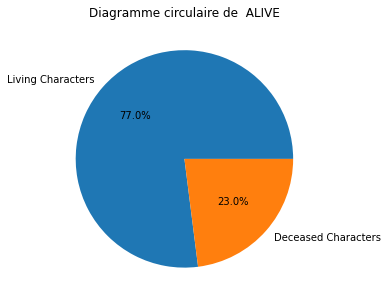

In [146]:
# Table des effectifs
effectif = df['ALIVE'].value_counts()
print("Table des effectifs de 'ALIVE'")
print(effectif)

# Table des fréquences
alive_freq = df['ALIVE'].value_counts(normalize=True)
print("\nTable des fréquences de 'ALIVE'")
print(alive_freq)

# Diagramme en barres
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='ALIVE')
plt.title('Diagramme en barres de ALIVE')
plt.xlabel('ALIVE')
plt.ylabel('Nombre de personnages')
plt.xticks(rotation=20)
plt.show()

# Diagramme circulaire
plt.figure(figsize=(5, 5))
plt.pie(effectif, labels=effectif.index, autopct='%1.1f%%')
plt.title('Diagramme circulaire de  ALIVE')
plt.show()

### 7-Représenter conjointement les variables 'ALIGN' et 'ALIVE' par les trois types de diagrammes à barres.

#### Diagramme à barres groupées

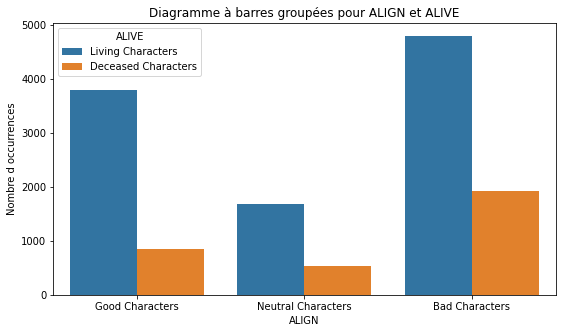

In [147]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='ALIGN', hue='ALIVE')
plt.title('Diagramme à barres groupées pour ALIGN et ALIVE')
plt.xlabel('ALIGN')
plt.ylabel('Nombre d occurrences')
plt.legend(title='ALIVE')
plt.show()

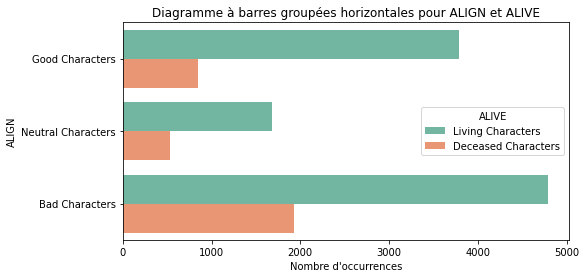

In [148]:
# Diagramme à barres groupées horizontales
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='ALIGN', hue='ALIVE', palette='Set2')
plt.title('Diagramme à barres groupées horizontales pour ALIGN et ALIVE')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('ALIGN')
plt.legend(title='ALIVE')
plt.show()

#### Diagramme à barres empilées

ALIVE               Deceased Characters  Living Characters
ALIGN                                                     
Bad Characters                     1929               4791
Good Characters                     843               3793
Neutral Characters                  527               1681


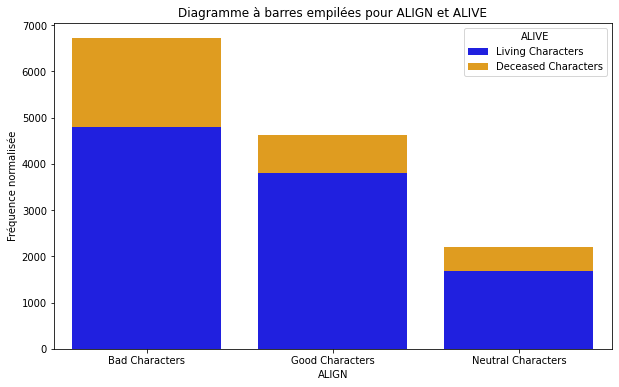

In [149]:
# Calcul des fréquences conjointes
freq_conj = pd.crosstab(df['ALIGN'], df['ALIVE'])
print(freq_conj)
# Le diagramme à barres empilées  
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_conj.reset_index(), x='ALIGN', y='Living Characters', color='blue', label='Living Characters')
sns.barplot(data=freq_conj.reset_index(), x='ALIGN', y='Deceased Characters', color='orange', bottom=freq_conj['Living Characters'], label='Deceased Characters')
plt.title('Diagramme à barres empilées pour ALIGN et ALIVE')
plt.xlabel('ALIGN')
plt.ylabel('Fréquence normalisée')
plt.legend(title='ALIVE')
plt.show()

ALIVE               Deceased Characters  Living Characters
ALIGN                                                     
Bad Characters                 0.287054           0.712946
Good Characters                0.181838           0.818162
Neutral Characters             0.238678           0.761322


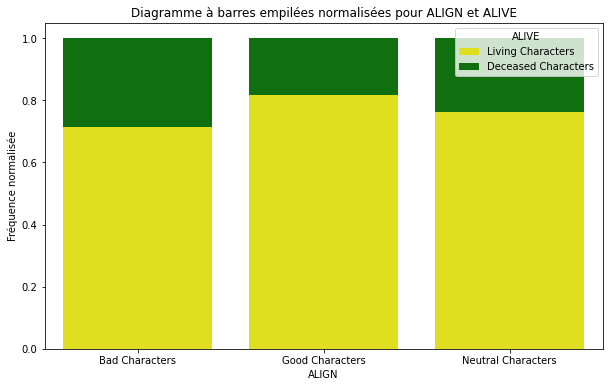

In [150]:
# Calcul des fréquences conjointes normalisées
freq_conj = pd.crosstab(df['ALIGN'], df['ALIVE']) #ou df.groupby(['ALIGN', 'ALIVE']).size().unstack()
freq_conj_norm = joint_counts.div(joint_counts.sum(axis=1), axis=0)
print(freq_conj_norm )

#le diagramme à barres empilées normalisées
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_conj_norm .reset_index(), x='ALIGN', y='Living Characters', color='yellow', label='Living Characters')
sns.barplot(data=freq_conj_norm .reset_index(), x='ALIGN', y='Deceased Characters', color='g', bottom=freq_conj_norm['Living Characters'], label='Deceased Characters')
plt.title('Diagramme à barres empilées normalisées pour ALIGN et ALIVE')
plt.xlabel('ALIGN')
plt.ylabel('Fréquence normalisée')
plt.legend(title='ALIVE')
plt.show()

### 8-Donner la table de contingence des variables 'ALIGN' et 'ALIVE' (fonction 'crosstab' de pandas) puis effectuer un test d'indépendance du Khi-deux à un seuil de 5% (formuler les hypothèses, mener le test à l'aide de la fonction 'chi2_contingency' du module scipy stats puis conclure).

#### L'hypothèse nulle: (H0) Les variables 'ALIGN' et 'ALIVE'  sont  indépendantes
#### L'hypothèse alternative : (H1) Les variables 'ALIGN' et 'ALIVE' ne sont pas indépendantes

In [151]:
from scipy.stats import chi2_contingency

# Table de contingence
table_contingence = pd.crosstab(df['ALIGN'], df['ALIVE'])

print("Table de contingence des variables 'ALIGN' et 'ALIVE':")
print(table_contingence)

# Test d'indépendance du khi-deux
chi2, p, ddl, freq = chi2_contingency(table_contingence)

print("\nRésultats du test d'indépendance du khi-deux ")
print("\nStatistic Chi-Square", chi2)
print("\nvaleur p", p)
print("\nDegré de liberté", ddl)
print("\nExpected Frequencies Table")
print(freq)

# Conclusion
alpha = 0.05
print("\nConclusion :")
if p < alpha:
    print("Nous rejetons l'hypothèse nulle (H0) Les variables 'ALIGN' et 'ALIVE' ne sont pas indépendantes.")
else:
    print("Nous ne pouvons pas rejeter l'hypothèse nulle (H0) Les variables 'ALIGN' et 'ALIVE' sont indépendantes.")

Table de contingence des variables 'ALIGN' et 'ALIVE':
ALIVE               Deceased Characters  Living Characters
ALIGN                                                     
Bad Characters                     1929               4791
Good Characters                     843               3793
Neutral Characters                  527               1681

Résultats du test d'indépendance du khi-deux 

Statistic Chi-Square 165.29508607602827

valeur p 1.2782862450286972e-36

Degré de liberté 2

Expected Frequencies Table
[[1634.42052492 5085.57947508]
 [1127.55558832 3508.44441168]
 [ 537.02388676 1670.97611324]]

Conclusion :
Nous rejetons l'hypothèse nulle (H0) Les variables 'ALIGN' et 'ALIVE' ne sont pas indépendantes.


### 9- La variable 'SEX' est-elle réellement exploitable en l'état ? Utilise la méthode 'replace' de pandas pour créer une nouvelle modalité 'Other' qui regroupera les deux modalités minoritaires. Étudier ensuite cette variable individuellement puis conjointement avec les précédentes.

In [152]:
#Les modalités et leur distribution pour la variable 'SEX'
effectifs = df['SEX'].value_counts()
print("Distribution des modalités pour la variable 'SEX'")
print(effectifs)

# Remplacemant des modalités minoritaires par 'Other'
df['SEX'] = df['SEX'].replace(['Agender Characters', 'Genderfluid Characters'], 'Other')

# Vérifier à nouveau la distribution après remplacement
nouvelle_var = df['SEX'].value_counts()
print("\n mise à jour des modalités de la variable 'SEX':")
print(nouvelle_var)

Distribution des modalités pour la variable 'SEX'
Male Characters           11638
Female Characters          3837
Agender Characters           45
Genderfluid Characters        2
Name: SEX, dtype: int64

 mise à jour des modalités de la variable 'SEX':
Male Characters      11638
Female Characters     3837
Other                   47
Name: SEX, dtype: int64


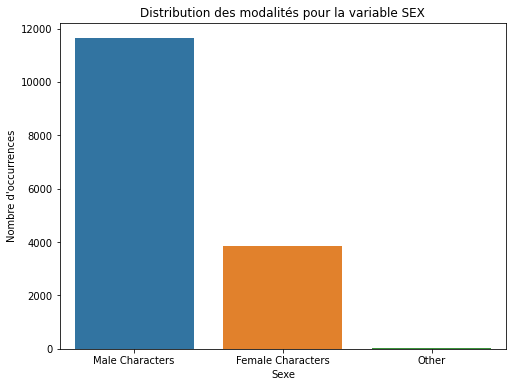

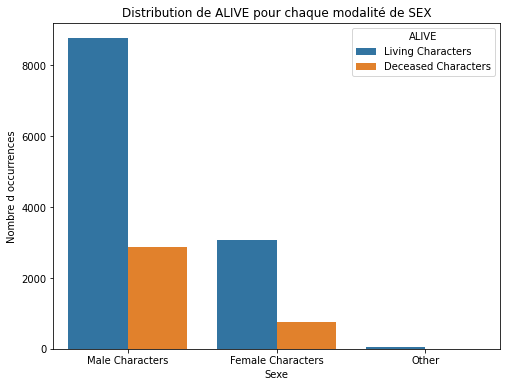

In [153]:
# Visualisation de la distribution des modalités de la variable 'SEX'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SEX')
plt.title('Distribution des modalités pour la variable SEX')
plt.xlabel('Sexe')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# Relation entre 'SEX' et la variable 'ALIVE'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SEX', hue='ALIVE')
plt.title('Distribution de ALIVE pour chaque modalité de SEX')
plt.xlabel('Sexe')
plt.ylabel('Nombre d occurrences')
plt.legend(title='ALIVE')
plt.show()

### 10-Étudier la variable 'Year' en la considérant comme qualitative ordinale.

Distribution des valeurs pour la variable 'Year':
1939.0     69
1940.0    221
1941.0    207
1942.0    244
1943.0    198
         ... 
2009.0    302
2010.0    324
2011.0    349
2012.0    201
2013.0    167
Name: Year, Length: 75, dtype: int64

Table des fréquences de 'Year'
1993.0    0.035602
1994.0    0.031168
1992.0    0.029240
2006.0    0.024484
2008.0    0.023135
            ...   
1952.0    0.001671
1956.0    0.001028
1957.0    0.000450
1959.0    0.000257
1958.0    0.000129
Name: Year, Length: 75, dtype: float64


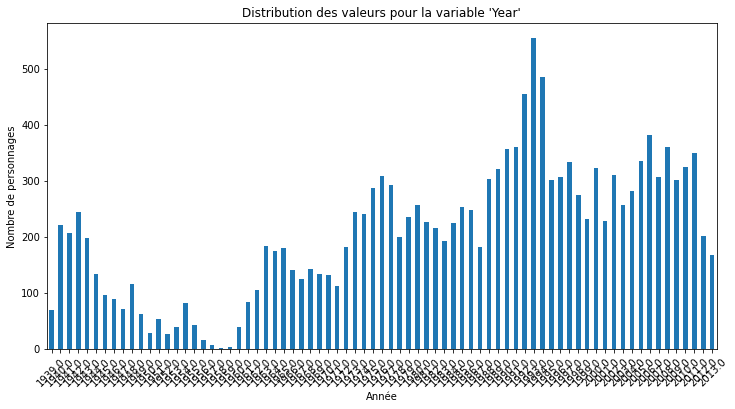

In [162]:
# Distribution des valeurs de la variable 'Year'
effectifs = df['Year'].value_counts().sort_index()
print("Distribution des valeurs pour la variable 'Year':")
print(effectifs)

# Table des fréquences
freq = df['Year'].value_counts(normalize=True) #*100 c'est on veut les pourcentages
print("\nTable des fréquences de 'Year'")
print(freq)

# Diagramme en barres pour visualiser la distribution des années
plt.figure(figsize=(12, 6))
effectifs.plot(kind='bar')
plt.title("Distribution des valeurs pour la variable 'Year'")
plt.xlabel('Année')
plt.ylabel('Nombre de personnages')
plt.xticks(rotation=45)
plt.show()

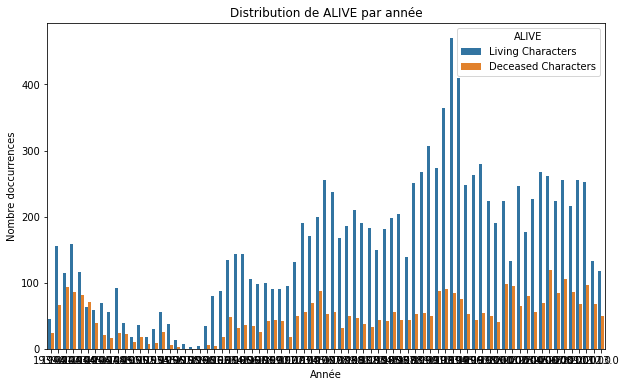

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse de la distribution de la 'ALIVE' variable par année 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', hue='ALIVE')
plt.title('Distribution de ALIVE par année')
plt.xlabel('Année')
plt.ylabel('Nombre doccurrences')
plt.legend(title='ALIVE')
plt.show()

Distribution des valeurs pour la variable 'Decade'
1930s      69
1940s    1441
1950s     302
1960s    1306
1970s    2234
1980s    2425
1990s    3657
2000s    3086
2010s    1041
2020s       0
Name: Decade, dtype: int64


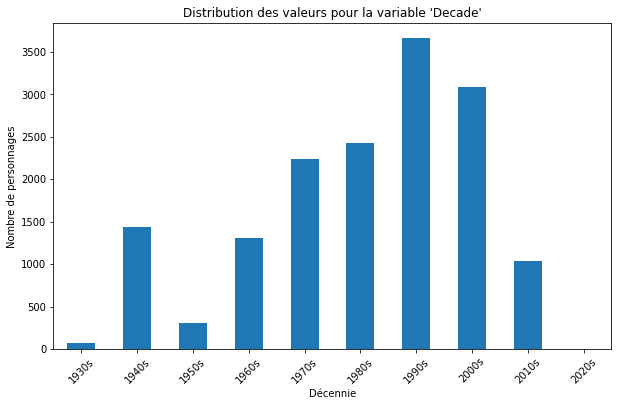

In [158]:
#la variable 'Decade' qui regroupe les années par décennie
df['Decade'] = pd.cut(df['Year'], bins=range(1930, 2031, 10), labels=[f"{decade}s" for decade in range(1930, 2030, 10)])

#la distribution de la nouvelle variable 'Decade'
effectifs = df['Decade'].value_counts().sort_index()

print("Distribution des valeurs pour la variable 'Decade'")
print(effectifs)

# Diagramme en barres pour visualiser la distribution des décennies
plt.figure(figsize=(10, 6))
effectifs.plot(kind='bar')
plt.title("Distribution des valeurs pour la variable 'Decade'")
plt.xlabel('Décennie')
plt.ylabel('Nombre de personnages')
plt.xticks(rotation=45)
plt.show()

In [161]:
# Nettoyage de la variable 'EYE'
df['EYE'] = df['EYE'].str.replace('Eyes', '').str.strip()

# Nettoyage de la variable 'HAIR'
df['HAIR'] =df['HAIR'].str.replace('Hair', '').str.strip()

# Vérification des valeurs uniques après nettoyage
eye_colors_unique = df['EYE'].unique()
hair_colors_unique = df['HAIR'].unique()

print("Valeurs uniques pour la variable 'EYE' après nettoyage :")
print(eye_colors_unique)

print("\nValeurs uniques pour la variable 'HAIR' après nettoyage :")
print(hair_colors_unique)

Valeurs uniques pour la variable 'EYE' après nettoyage :
['Hazel' 'Blue' 'Brown' 'Green' 'Grey' 'Yellow' 'Gold' 'Red'
 'Black Eyeballs' 'Amber' 'Variable' nan 'Black' 'White' 'Orange' 'Silver'
 'Purple' 'Pink' 'One Eye' 'Violet' 'Multiple' 'Magenta' 'Yellow Eyeballs'
 'No' 'Compound']

Valeurs uniques pour la variable 'HAIR' après nettoyage :
['Brown' 'White' 'Black' 'Blond' 'No' 'Blue' 'Red' 'Bald' 'Auburn' 'Grey'
 'Silver' 'Purple' 'Strawberry Blond' 'Green' 'Reddish Blond' 'Gold' nan
 'Orange' 'Pink' 'Variable' 'Yellow' 'Light Brown' 'Magenta' 'Bronze'
 'Dyed' 'Orange-brown']
